In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
pd.options.plotting.backend = 'plotly'

In [8]:
df = pd.read_csv('/Users/mcs275/dat-class-repo/Homework/Unit2/data/housing.csv')

In [9]:
tree = DecisionTreeRegressor(max_depth = 3)

In [10]:
X = df.drop('PRICE',axis = 1) ##drop everything but the price column

In [11]:
y = df['PRICE']

tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

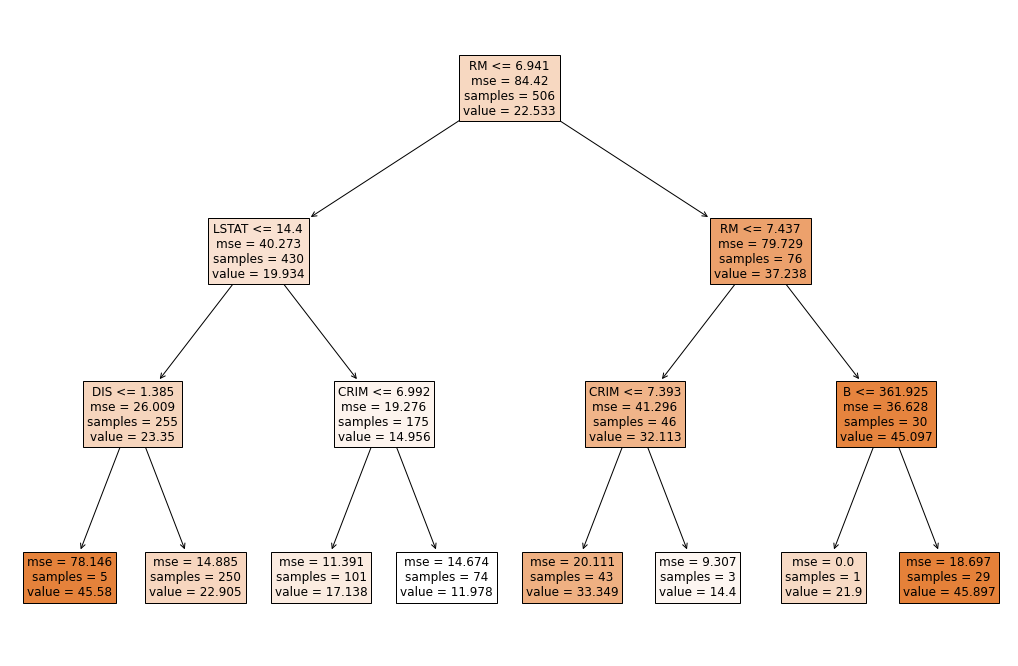

In [20]:
plt.figure(figsize = (18, 12))
plot_tree(tree, fontsize = 12, filled=True, feature_names = X.columns);

In [15]:
root_error = np.mean((df['PRICE'] -df['PRICE'].mean())**2)

left = df[df['RM'] <= 6.94]
right = df[df['RM'] > 6.94]

left_error = np.mean((left['PRICE'] - left['PRICE'].mean())**2)
right_error = np.mean((right['PRICE'] - right['PRICE'].mean())**2)

In [16]:
left_w = left.shape[0] / df.shape[0]
right_w = right.shape[0] / df.shape[0]



info_gain = root_error - left_w * left_error - right_w * right_error

In [17]:
info_gain

38.220464479057114

In [18]:
root_error

84.4195561561656

In [19]:
left_w

0.849802371541502

In [21]:
##feature importance is way of determining how important different variables are in your model

In [22]:
tree.feature_importances_

array([0.06136689, 0.        , 0.        , 0.        , 0.        ,
       0.64124098, 0.        , 0.0721473 , 0.        , 0.        ,
       0.        , 0.01593447, 0.20931036])

In [25]:
feats = pd.DataFrame({
    'Column': X.columns,
    'Importance': tree.feature_importances_
    }
)  ##create dictionary with feature importance array & column names and then turn into a dataframe

In [26]:
feats.sort_values(by='Importance', ascending=False)  ##avg of root error across all the individual columns

,Column,Importance
5,RM,0.641241
12,LSTAT,0.209310
7,DIS,0.072147
0,CRIM,0.061367
11,B,0.015934
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


In [28]:
df = pd.read_csv('/Users/mcs275/dat-class-repo/Homework/Unit2/data/master.csv', parse_dates = ['visit_date'])

In [29]:
df

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0


In [30]:
df.describe()

,visitors,holiday,latitude,longitude,reserve_visitors
count,252108.000000,252108.000000,252108.000000,252108.000000,108394.000000
mean,20.973761,0.050673,35.613121,137.357865,16.699808
std,16.757007,0.219329,2.044473,3.671577,17.388735
min,1.000000,0.000000,33.211967,130.195555,1.000000
25%,9.000000,0.000000,34.692337,135.341564,4.000000
50%,17.000000,0.000000,35.658068,139.670038,10.000000
75%,29.000000,0.000000,35.694003,139.751599,24.000000
max,877.000000,1.000000,44.020632,144.273398,96.000000


In [32]:
df.isnull().sum()

id                       0
visit_date               0
visitors                 0
calendar_date            0
day_of_week              0
holiday                  0
genre                    0
area                     0
latitude                 0
longitude                0
reserve_visitors    143714
dtype: int64

In [33]:
df['reserve_visitors'].value_counts().sort_index()

1.0      1975
2.0     13587
3.0      5376
4.0      8042
5.0      3581
6.0      4627
7.0      6713
8.0      5639
9.0      3738
10.0     6703
11.0     2439
12.0     3677
13.0      744
14.0     1318
15.0     2259
16.0      704
17.0     1459
18.0     1047
20.0      722
21.0     2591
22.0      696
23.0     3564
24.0      613
25.0     3476
27.0      736
28.0      706
30.0     1297
31.0      738
32.0     1182
33.0      771
35.0     1358
36.0     2033
37.0      774
40.0      731
41.0      772
42.0      608
43.0     1372
44.0     1246
46.0     1393
47.0      771
48.0      603
51.0      659
54.0      767
58.0      574
59.0      672
60.0     1411
76.0      767
83.0      575
96.0      588
Name: reserve_visitors, dtype: int64

In [38]:
df['reserve_visitors_na'] = df['reserve_visitors'].isnull()  ##create helper column to indicate where reserve_visitors was null

In [36]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(0) ##then fill the nulls with 0

In [39]:
##can split on the indicator column if the missing values were imputed incorrectly

In [40]:
##could do a grouping and use the mean median or modal value in the missing values

In [43]:
transformed = df.groupby(['day_of_week', 'area'])['reserve_visitors'].transform('mean') ##applying that value to that column in the dataframe

In [45]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(transformed.astype(int))

In [46]:
df

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors,reserve_visitors_na
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,False
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,False
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,False
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,False
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0,False
252104,air_a17f0778617c76e2,2017-04-22,60,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0,False
252105,air_a17f0778617c76e2,2017-03-26,69,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0,False
252106,air_a17f0778617c76e2,2017-03-20,31,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0,False


In [47]:
df = pd.read_csv('/Users/mcs275/dat-class-repo/Homework/Unit2/data/master.csv', parse_dates = ['visit_date'])

In [48]:
query = df['reserve_visitors'].isnull()

In [49]:
train = df.loc[~query, :] #where this is not true
test = df.loc[query, :]


In [51]:
train  #where values are not missing

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
11,air_ba937bf13d40fb24,2016-01-26,11,2016-01-26,Tuesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0
21,air_ba937bf13d40fb24,2016-02-09,15,2016-02-09,Tuesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,7.0
24,air_ba937bf13d40fb24,2016-02-12,26,2016-02-12,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,18.0
25,air_ba937bf13d40fb24,2016-02-13,8,2016-02-13,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0
37,air_ba937bf13d40fb24,2016-02-27,23,2016-02-27,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,2.0
...,...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.0
252104,air_a17f0778617c76e2,2017-04-22,60,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.0
252105,air_a17f0778617c76e2,2017-03-26,69,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.0
252106,air_a17f0778617c76e2,2017-03-20,31,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.0


In [52]:
test #values where it is missing

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN
...,...,...,...,...,...,...,...,...,...,...,...
252087,air_a17f0778617c76e2,2017-04-04,10,2017-04-04,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252092,air_a17f0778617c76e2,2017-04-10,28,2017-04-10,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252099,air_a17f0778617c76e2,2017-04-17,19,2017-04-17,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN
252100,air_a17f0778617c76e2,2017-04-18,11,2017-04-18,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,NaN


In [54]:
X = train.select_dtypes(include = np.number).drop('reserve_visitors', axis = 1)
y = train['reserve_visitors']

tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [55]:
test.iloc[:,:-1]

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599
...,...,...,...,...,...,...,...,...,...,...
252087,air_a17f0778617c76e2,2017-04-04,10,2017-04-04,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
252092,air_a17f0778617c76e2,2017-04-10,28,2017-04-10,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
252099,air_a17f0778617c76e2,2017-04-17,19,2017-04-17,Monday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
252100,air_a17f0778617c76e2,2017-04-18,11,2017-04-18,Tuesday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852


In [66]:
##making prediction on the missing value then passing it to series and filling the nas with the predicted values

In [63]:
series = pd.Series(tree.predict(test.select_dtypes(include = np.number).drop('reserve_visitors', axis = 1))) #pass np array into Series

In [64]:
df['reserve_visitors'] = df['reserve_visitors'].fillna(series)

In [65]:
df

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,Wednesday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,Thursday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,Friday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,Saturday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,Monday,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...,...
252103,air_a17f0778617c76e2,2017-04-21,49,2017-04-21,Friday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,6.000000
252104,air_a17f0778617c76e2,2017-04-22,60,2017-04-22,Saturday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,37.000000
252105,air_a17f0778617c76e2,2017-03-26,69,2017-03-26,Sunday,0,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,35.000000
252106,air_a17f0778617c76e2,2017-03-20,31,2017-03-20,Monday,1,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,3.000000


In [67]:
#if imputing time sensitive data, fill in with teh most recent observation (last reported value that we had)

In [68]:
df['reserve_visitors'].rolling(5).mean().bfill() 

0         16.180225
1         16.180225
2         16.180225
3         16.180225
4         16.180225
            ...    
252103    16.400000
252104    16.400000
252105    16.400000
252106    16.400000
252107    22.600000
Name: reserve_visitors, Length: 252108, dtype: float64

In [70]:
df['reserve_visitors'].rolling(5).mean().ffill()  ##better to forward fill otherwise you are using data from the future to fill in the past could bias your model

0               NaN
1               NaN
2               NaN
3               NaN
4         16.180225
            ...    
252103     9.000000
252104     9.000000
252105     9.000000
252106    16.400000
252107    22.600000
Name: reserve_visitors, Length: 252108, dtype: float64

In [83]:
import category_encoders as ce

In [84]:
ore = ce.OrdinalEncoder()

In [73]:
ore.fit_transform(df)

,id,visit_date,visitors,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,1,2016-01-13,25,1,1,0,1,1,35.658068,139.751599,16.193206
1,1,2016-01-14,32,2,2,0,1,1,35.658068,139.751599,16.193206
2,1,2016-01-15,29,3,3,0,1,1,35.658068,139.751599,16.193206
3,1,2016-01-16,22,4,4,0,1,1,35.658068,139.751599,16.160754
4,1,2016-01-18,6,5,5,0,1,1,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...,...
252103,829,2017-04-21,49,390,3,0,4,10,34.695124,135.197852,6.000000
252104,829,2017-04-22,60,391,4,0,4,10,34.695124,135.197852,37.000000
252105,829,2017-03-26,69,444,7,0,4,10,34.695124,135.197852,35.000000
252106,829,2017-03-20,31,467,5,1,4,10,34.695124,135.197852,3.000000


In [74]:
##ordinal encoding makes sense when it's a ranked, ordered categories

In [75]:
##ordinal works okay with tree based models

In [76]:
ore.mapping

[{'col': 'id',
  'mapping': air_ba937bf13d40fb24      1
  air_25e9888d30b386df      2
  air_fd6aac1043520e83      3
  air_64d4491ad8cdb1c6      4
  air_ee3a01f0c71a769f      5
                         ... 
  air_cf5ab75a0afb8af9    826
  air_1c0b150f9e696a5f    827
  air_900d755ebd2f7bbd    828
  air_a17f0778617c76e2    829
  NaN                      -2
  Length: 830, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'calendar_date',
  'mapping': 2016-01-13      1
  2016-01-14      2
  2016-01-15      3
  2016-01-16      4
  2016-01-18      5
               ... 
  2016-01-01    475
  2016-01-03    476
  2017-01-02    477
  2016-01-02    478
  NaN            -2
  Length: 479, dtype: int64,
  'data_type': dtype('O')},
 {'col': 'day_of_week',
  'mapping': Wednesday    1
  Thursday     2
  Friday       3
  Saturday     4
  Monday       5
  Tuesday      6
  Sunday       7
  NaN         -2
  dtype: int64,
  'data_type': dtype('O')},
 {'col': 'genre',
  'mapping': Dining bar                 

In [78]:
ore = ce.OrdinalEncoder(mapping = [
        {
            'col': 'day_of_week',
            'mapping': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
        }
])

In [79]:
ore

OrdinalEncoder(mapping=[{'col': 'day_of_week',
                         'mapping': {'Friday': 5, 'Monday': 1, 'Saturday': 6,
                                     'Sunday': 7, 'Thursday': 4, 'Tuesday': 2,
                                     'Wednesday': 3}}])

In [88]:
ohe = ce.OneHotEncoder(cols = ['day_of_week'])

In [90]:
ohe.fit_transform(df[:1000])

,id,visit_date,visitors,calendar_date,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,holiday,genre,area,latitude,longitude,reserve_visitors
0,air_ba937bf13d40fb24,2016-01-13,25,2016-01-13,1,0,0,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
1,air_ba937bf13d40fb24,2016-01-14,32,2016-01-14,0,1,0,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
2,air_ba937bf13d40fb24,2016-01-15,29,2016-01-15,0,0,1,0,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.193206
3,air_ba937bf13d40fb24,2016-01-16,22,2016-01-16,0,0,0,1,0,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
4,air_ba937bf13d40fb24,2016-01-18,6,2016-01-18,0,0,0,0,1,0,0,0,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,air_fd6aac1043520e83,2017-01-20,49,2017-01-20,0,0,1,0,0,0,0,0,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,9.000000
996,air_fd6aac1043520e83,2017-01-21,19,2017-01-21,0,0,0,1,0,0,0,0,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,21.000000
997,air_fd6aac1043520e83,2017-01-23,23,2017-01-23,0,0,0,0,1,0,0,0,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,25.000000
998,air_fd6aac1043520e83,2017-01-24,28,2017-01-24,0,0,0,0,0,1,0,0,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,11.000000


In [91]:
#target encoding for categorical data with a lot of unique values
te = ce.TargetEncoder()

In [93]:
df.groupby('id').mean()['visitors']

id
air_00a91d42b08b08d9    26.081897
air_0164b9927d20bcc3     9.248322
air_0241aa3964b7f861     9.896465
air_0328696196e46f18     7.939655
air_034a3d5b40d5b1b1    14.828685
                          ...    
air_fea5dc9594450608    14.485401
air_fee8dcf4d619598e    26.027778
air_fef9ccb3ba0da2f7     9.620408
air_ffcc2d5087e1b476    20.242798
air_fff68b929994bfbd     5.089219
Name: visitors, Length: 829, dtype: float64

In [94]:
#take average values and project them to entire data set
df.groupby('id')['visitors'].transform('mean')

0         22.782609
1         22.782609
2         22.782609
3         22.782609
4         22.782609
            ...    
252103    44.595745
252104    44.595745
252105    44.595745
252106    44.595745
252107    44.595745
Name: visitors, Length: 252108, dtype: float64

In [96]:
X = df.drop('visitors', axis =1)
y = df['visitors']

In [98]:
te.fit_transform(X, y)

,id,visit_date,calendar_date,day_of_week,holiday,genre,area,latitude,longitude,reserve_visitors
0,22.782609,2016-01-13,18.433460,19.230121,0,18.723532,19.609418,35.658068,139.751599,16.193206
1,22.782609,2016-01-14,19.229927,18.922702,0,18.723532,19.609418,35.658068,139.751599,16.193206
2,22.782609,2016-01-15,23.506897,23.072737,0,18.723532,19.609418,35.658068,139.751599,16.193206
3,22.782609,2016-01-16,26.780142,26.313688,0,18.723532,19.609418,35.658068,139.751599,16.160754
4,22.782609,2016-01-18,14.486726,17.177009,0,18.723532,19.609418,35.658068,139.751599,16.160754
...,...,...,...,...,...,...,...,...,...,...
252103,44.595745,2017-04-21,25.030612,23.072737,0,22.582953,20.466463,34.695124,135.197852,6.000000
252104,44.595745,2017-04-22,27.448320,26.313688,0,22.582953,20.466463,34.695124,135.197852,37.000000
252105,44.595745,2017-03-26,24.098333,23.873362,0,22.582953,20.466463,34.695124,135.197852,35.000000
252106,44.595745,2017-03-20,24.043400,17.177009,1,22.582953,20.466463,34.695124,135.197852,3.000000
